In [3]:
import torch
from torchvision.io.image import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

p1 = read_image("images/1.jpeg").to(device)  # move image to device
p2 = read_image("images/2.jpeg").to(device)
p3 = read_image("images/3.jpeg").to(device)

person_list = [p1, p2, p3]

# Step 1: Initialize model with the best available weights
weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
model = keypointrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.to(device)
model = model.eval()

# Step 2: Initialize the inference transforms
transforms = weights.transforms()

person_float = transforms(person_list[0])

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /Users/lapuerta/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth


In [7]:
outputs = model([person_float])
output = outputs[0] # because we only have one person?
keypoints = output['keypoints']
keypoints_scores = output['keypoints_scores']
boxes = output['boxes']
box_scores = output['scores']
labels = output['labels']

print(output)

{'boxes': tensor([[ 401.7147,  174.7544, 1208.6128, 2072.9521],
        [ 441.9005, 1018.4056, 1206.5620, 1988.7142]],
       grad_fn=<StackBackward0>), 'labels': tensor([1, 1]), 'scores': tensor([0.9999, 0.0806], grad_fn=<IndexBackward0>), 'keypoints': tensor([[[8.5410e+02, 4.3578e+02, 1.0000e+00],
         [9.0403e+02, 3.7578e+02, 1.0000e+00],
         [7.9218e+02, 3.6977e+02, 1.0000e+00],
         [9.3599e+02, 4.0578e+02, 1.0000e+00],
         [6.9032e+02, 4.0178e+02, 1.0000e+00],
         [1.0259e+03, 7.5782e+02, 1.0000e+00],
         [5.1856e+02, 7.5381e+02, 1.0000e+00],
         [1.0918e+03, 1.2299e+03, 1.0000e+00],
         [4.8460e+02, 1.2599e+03, 1.0000e+00],
         [1.1617e+03, 1.6739e+03, 1.0000e+00],
         [4.5864e+02, 1.6959e+03, 1.0000e+00],
         [9.9191e+02, 1.4659e+03, 1.0000e+00],
         [6.5437e+02, 1.5019e+03, 1.0000e+00],
         [9.5196e+02, 2.0680e+03, 1.0000e+00],
         [6.4838e+02, 2.0680e+03, 1.0000e+00],
         [9.4597e+02, 2.0680e+03, 1.0000e

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [9]:
# throw away the lower shitty box
detect_threshold = 0.75
idx = torch.where(box_scores > detect_threshold)
keypoints = keypoints[idx] # update to only relevant keypoints
boxes = boxes[idx]
print("boxes:", boxes)
print("labels:", labels)

boxes: tensor([[ 401.7147,  174.7544, 1208.6128, 2072.9521]],
       grad_fn=<IndexBackward0>)
labels: tensor([1, 1])


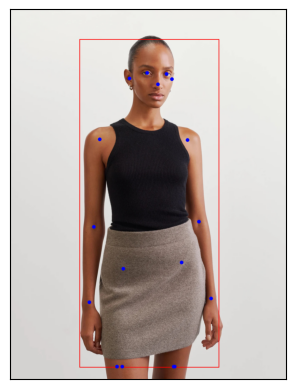

In [11]:
from torchvision.utils import draw_keypoints, draw_bounding_boxes

image_with_box = draw_bounding_boxes(person_list[0], boxes=boxes,colors="red",width=4)

image_with_box_and_keypoints = draw_keypoints(image_with_box, keypoints, colors="blue", radius=10)
show(image_with_box_and_keypoints)